In [1]:
# import all the required libraries and modules
import numpy as np
import pandas as pd
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
import string
punctuations=list(string.punctuation)
stop=stop+punctuations
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MEGHATUTTU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MEGHATUTTU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# collect the training and testing  data
train_data=pd.read_csv("train-emotion.csv", delimiter=";",names=["sentences","labels"],header=None)
test_data=pd.read_csv("test-emotion.csv", delimiter=";",names=["sentences","labels"],header=None)

In [3]:
df_train=pd.DataFrame(data=train_data)
df_test=pd.DataFrame(data=test_data)

In [29]:
frames=[df_train,df_test]
df=pd.concat(frames)

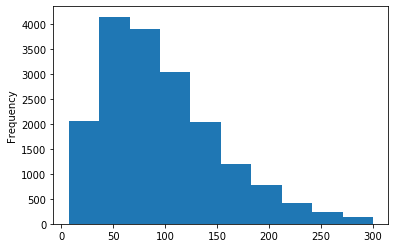

In [32]:
# histogram representation of length of the sentences
df['sentences'].str.len().plot.hist()

In [33]:
# convert everything into lower case
df['sentences'].apply(lambda x: x.lower())
# removing tags and other unwanted strings
df['sentences'] = df['sentences'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))


In [34]:
# tokenize the string and convert into matrix
tokenizer = Tokenizer(num_words=2000, split=" ")
tokenizer.fit_on_texts(df['sentences'].values)

X= tokenizer.texts_to_sequences(df['sentences'].values)
X = pad_sequences(X)






In [43]:
# one hot encoding the labels
Y = pd.get_dummies(df['labels']).values
#  divide into training and testing data
import sklearn
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y,random_state=1)


In [44]:
# prepare the RNN model
model = Sequential()
model.add(Embedding(2000, 256, input_length=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.3))
model.add(LSTM(256, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(6, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 61, 256)           512000    
_________________________________________________________________
dropout (Dropout)            (None, 61, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 61, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 1,564,166
Trainable params: 1,564,166
Non-trainable params: 0
____________________________________________

In [41]:
X_test.shape

(4500, 61)

In [45]:
# train the model on training data
batch_size = 50
epochs = 7

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/7
270/270 - 737s - loss: 1.2624 - accuracy: 0.5110
Epoch 2/7
270/270 - 798s - loss: 0.4076 - accuracy: 0.8592
Epoch 3/7
270/270 - 797s - loss: 0.2303 - accuracy: 0.9168
Epoch 4/7
270/270 - 788s - loss: 0.1791 - accuracy: 0.9285
Epoch 5/7
270/270 - 725s - loss: 0.1531 - accuracy: 0.9355
Epoch 6/7
270/270 - 645s - loss: 0.1418 - accuracy: 0.9383
Epoch 7/7
270/270 - 559s - loss: 0.1286 - accuracy: 0.9421


In [46]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)

141/141 [==============================] - 31s 217ms/step - loss: 0.1914 - accuracy: 0.9180


In [47]:
score

[0.19136632978916168, 0.9179999828338623]